<a href="https://colab.research.google.com/github/saadmarwan16/Tensorflow/blob/main/linear_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import tensorflow as tf

In [19]:
from sklearn.datasets import load_breast_cancer

In [20]:
data = load_breast_cancer()

In [21]:
type(data)

sklearn.utils.Bunch

In [22]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [23]:
data.data.shape

(569, 30)

In [24]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [25]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [26]:
data.target.shape

(569,)

In [27]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [30]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [31]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,),),
    tf.keras.layers.Dense(1, activation='sigmoid',)
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

r = model.fit(X_train, y_train, validation_data=(X_test, y_test,), epochs=100,)

print(f'Train score: {model.evaluate(X_train, y_train)}')
print(f'Test score: {model.evaluate(X_test, y_test)}')

Epoch 1/100
12/12 [==============================] - 1s 14ms/step - loss: 0.9950 - accuracy: 0.2073 - val_loss: 0.8757 - val_accuracy: 0.3404
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 0.8960 - accuracy: 0.2887 - val_loss: 0.7908 - val_accuracy: 0.4521
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 0.8073 - accuracy: 0.3832 - val_loss: 0.7169 - val_accuracy: 0.5213
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 0.7320 - accuracy: 0.5171 - val_loss: 0.6525 - val_accuracy: 0.6170
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 0.6653 - accuracy: 0.6168 - val_loss: 0.5983 - val_accuracy: 0.6862
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 0.6090 - accuracy: 0.7139 - val_loss: 0.5522 - val_accuracy: 0.7447
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5613 - accuracy: 0.7953 - val_loss: 0.5127 - val_accuracy: 0.7660
Epoch 8/100


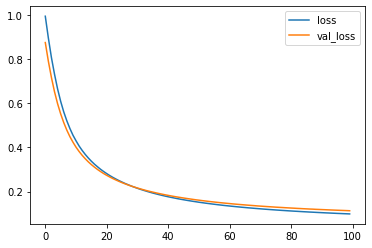

In [32]:
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

In [33]:
print(r.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


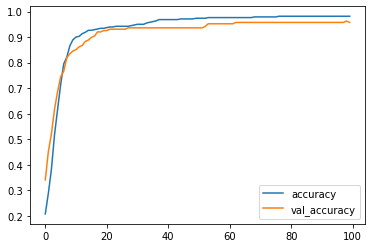

In [34]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend();

In [35]:
P = model.predict(X_test)
print(P)

[[7.4337870e-01]
 [9.6140373e-01]
 [1.5103817e-02]
 [9.9728584e-01]
 [4.3792886e-01]
 [9.9445415e-01]
 [7.0785284e-03]
 [1.6083121e-02]
 [9.8464978e-01]
 [9.3381035e-01]
 [7.3385644e-01]
 [6.0630661e-01]
 [9.4507802e-01]
 [9.4108534e-01]
 [9.4553542e-01]
 [6.4433300e-01]
 [3.4308136e-03]
 [9.8529625e-01]
 [1.7803431e-02]
 [2.3046502e-01]
 [5.4883522e-01]
 [1.0506153e-02]
 [7.6207519e-04]
 [2.5373578e-02]
 [9.8101276e-01]
 [2.3649901e-02]
 [9.9120641e-01]
 [9.5210278e-01]
 [7.2393489e-01]
 [8.2084012e-01]
 [8.5857046e-01]
 [9.4597286e-01]
 [9.8360932e-01]
 [9.0339386e-01]
 [9.2388797e-01]
 [8.0614662e-01]
 [5.5273634e-01]
 [8.7736154e-01]
 [9.9168020e-01]
 [1.2042015e-04]
 [9.7412443e-01]
 [9.0873313e-01]
 [9.3330574e-01]
 [2.3353845e-02]
 [2.6046336e-02]
 [9.3723094e-01]
 [7.3465866e-01]
 [9.7951514e-01]
 [2.0489920e-06]
 [7.0952570e-01]
 [9.6319866e-01]
 [9.9188209e-01]
 [5.3109527e-02]
 [9.9887604e-01]
 [5.6427538e-01]
 [9.6698052e-01]
 [2.6777387e-04]
 [9.0482038e-01]
 [9.9957967e-0

In [36]:
import numpy as np
P = np.round(P).flatten()
print(P)

[1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1.
 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1.
 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0.
 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1.
 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1.
 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0.]


In [37]:
print(f'Manually calculated accuracy: {np.mean(P == y_test)}')
print(f'Evaluate output: {model.evaluate(X_test, y_test)}')

Manually calculated accuracy: 0.9574468085106383
6/6 [==============================] - 0s 2ms/step - loss: 0.1129 - accuracy: 0.9574
Evaluate output: [0.11291282624006271, 0.957446813583374]


In [38]:
model.save('linear_classification.h5')

In [39]:
!ls -lh

total 24K
-rw-r--r-- 1 root root  19K Jul  2 08:23 linear_classification.h5
drwxr-xr-x 1 root root 4.0K Jun 15 13:37 sample_data


In [41]:
model = tf.keras.models.load_model('linear_classification.h5')
print(model.layers)
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.1129 - accuracy: 0.9574


[0.11291282624006271, 0.957446813583374]